In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:

# this is the path to the dataset
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230615-trial-kilosort_if_exists-norm=None-combine=True.pkl"
DFallpa = pd.read_pickle(path)


# Quick look at DFallpa

In [8]:
# This holds data across multiple brain regions (the "bregion" column)
# -- "event", the event during trial which this data is aligned to
# -- "twind", time extracted aligned to that event, in seconds
# -- pa, PopAnal class holding neurla data and behavioral features.
# -- pa_x_shape, shape of neural data, in (chans, trials, times)
# Ingore the "which_level"

display(DFallpa)


,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 424, 160)"
1,trial,03_samp,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(69, 424, 160)"
2,trial,03_samp,PMd,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(37, 424, 160)"
3,trial,03_samp,dlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(23, 424, 160)"
4,trial,03_samp,vlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(54, 424, 160)"
5,trial,03_samp,FP,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(35, 424, 160)"
6,trial,03_samp,SMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(53, 424, 160)"
7,trial,03_samp,preSMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(67, 424, 160)"
8,trial,05_first_raise,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 424, 160)"
9,trial,05_first_raise,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(69, 424, 160)"


In [9]:
# Pull out a single pa
pa = DFallpa["pa"].values[2]



In [11]:
# This holds data for a single brain area
# The main data is here, in pa.X, an array with dimensions (channels, trials, timepoints)
print(pa.X.shape)

# The labels for channels, trials, and times:
print("channels: ", pa.Chans)
print("trials: ", pa.Trials)
print("timepoints: ", pa.Times)




(37, 424, 160)
channels:  [1132, 1133, 1134, 1135, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1148, 1149, 1151, 1152, 1153, 1154, 1155, 1157, 1158, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1173, 1174, 1433]
trials:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 1

In [12]:
# Each trials has associated "features", saved here, where each row of this dataframe matches a trial
pa.Xlabels["trials"]


,seqc_2_locon,seqc_4_shapesem,seqc_1_angle,shape_is_novel_list,seqc_0_locy,seqc_5_center_binned,seqc_1_shapesemcat,seqc_4_angle,seqc_1_angle_binned,epoch,...,seqc_3_locon,loc_this_event,seqc_3_loc,shape_this_event,seqc_0_loc,seqc_4_center_binned,which_level,event,bregion,twind
0,"(nan, nan)",IGN,NaN,"(False,)",195.752451,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(0, 1)","(IGN, IGN)",Lcentered-4-1-0,"(0, 1)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
1,"(nan, nan)",IGN,NaN,"(False,)",-16.587354,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(1, 0)","(IGN, IGN)",V-2-3-0,"(1, 0)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
2,"(nan, nan)",IGN,NaN,"(False,)",-104.037895,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(0, 0)","(IGN, IGN)",Lcentered-4-1-0,"(0, 0)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
3,"(nan, nan)",IGN,NaN,"(False,)",301.936598,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(1, 1)","(IGN, IGN)",V-2-3-0,"(1, 1)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
4,"(nan, nan)",IGN,NaN,"(False,)",9.232623,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(1, 0)","(IGN, IGN)",circle-6-1-0,"(1, 0)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,"(nan, nan)",IGN,NaN,"(False,)",-100.995669,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(0, 0)","(IGN, IGN)",arcdeep-4-2-0,"(0, 0)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
420,"(nan, nan)",IGN,NaN,"(False,)",335.349640,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(1, 1)","(IGN, IGN)",zigzagSq-1-1-1,"(1, 1)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
421,"(nan, nan)",IGN,NaN,"(False,)",-92.719043,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(1, 0)","(IGN, IGN)",arcdeep-4-2-0,"(1, 0)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"
422,"(nan, nan)",IGN,NaN,"(False,)",23.582254,"(IGN, IGN)",IGN,NaN,IGN,230615,...,"(nan, nan)","(0, 0)","(IGN, IGN)",circle-6-1-0,"(0, 0)","(IGN, IGN)",trial,03_samp,PMd,"(-0.8, 0.8)"


In [ ]:
# e.g., to get the features for trial i, do this
trial = 10
features = pa.Xlabels["trials"].iloc[trial]
display(features)

seqc_1_loc                                     (IGNORE,)
gridsize                                  rig3_3x3_small
aborted                                            False
supervision_stage_concise                  off|0||1111|0
seqc_nstrokes_beh                                      1
event_time                                      3.298044
FEAT_num_strokes_task                                  1
trialcode                                    230615-2-20
seqc_1_shape                                      IGNORE
task_kind                                   prims_single
character                        singleprims-37-4-302765
FEAT_num_strokes_beh                                   1
seqc_0_shape                                   L|V-2-3-0
taskgroup                              singleprims-ss-37
origin                       [-0.0, -230.39999999999995]
epoch                                             230615
index_datapt                              (230615-2-20,)
donepos                      [-

##### PA has many helper functions to preprocess and plot the data. 

In [13]:
# Example plotting

array([[0.18995, 0.07176, 0.23217, 1.     ],
       [0.24427, 0.60937, 0.99697, 1.     ],
       [0.27597, 0.97092, 0.51653, 1.     ],
       [0.88331, 0.86553, 0.21719, 1.     ],
       [0.94084, 0.35566, 0.07031, 1.     ],
       [0.4796 , 0.01583, 0.01055, 1.     ]])

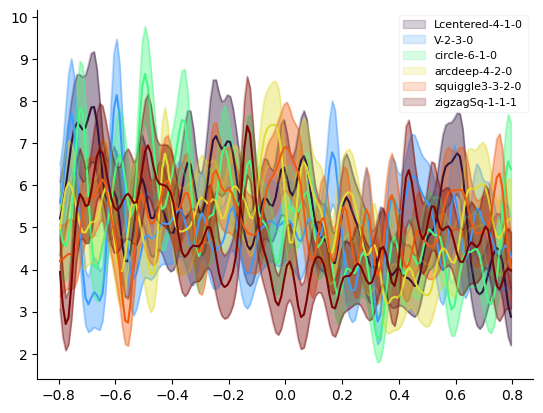

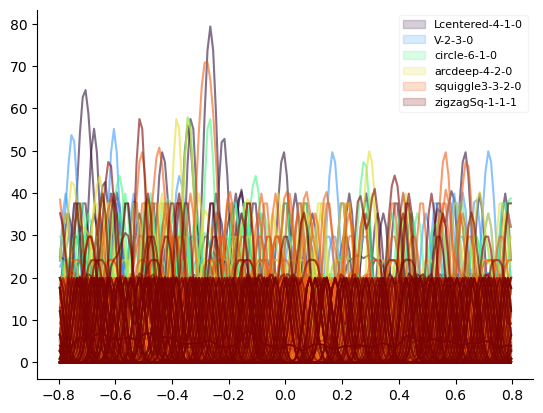

In [14]:
chan = pa.Chans[4]

fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan)


fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan, plot_indiv=True)


In [15]:
# Example processing. Here this picks out just a smaller time winodw


print("Times, before slicing: ", pa.Times)

twind = [-0.35, -0.3] # window: to only keep times within this window
pa = pa.slice_by_dim_values_wrapper("times", twind)

print("Times, after slicing:", pa.Times)

Times, before slicing:  [-0.795 -0.785 -0.775 -0.765 -0.755 -0.745 -0.735 -0.725 -0.715 -0.705
 -0.695 -0.685 -0.675 -0.665 -0.655 -0.645 -0.635 -0.625 -0.615 -0.605
 -0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385  0.395
  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485  0.495
  0.505  0.515  0.525  0.535  0.545  0.555  0.565  0.

# OTHER STUFF (Might not work properly in this notebook yet)

In [16]:
# Load a question
from neuralmonkey.analyses.rsa import rsagood_questions_dict
DictParamsEachQuestion = rsagood_questions_dict(animal, date)
q_params = DictParamsEachQuestion[question]
print(q_params)

NameError: name 'animal' is not defined

In [ ]:
# Normalize, etc
# Clean up DFallpa
from neuralmonkey.analyses.rsa import preprocess_rsa_prepare_popanal_wrapper, popanal_preprocess_scalar_normalization

subtract_mean_each_level_of_var = None
plot_example_chan = None

list_pa =[]
list_panorm = []
for pa in DFallpa["pa"].tolist():
    print(pa.X.shape)
    pa, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(pa, **q_params)
    print(pa.X.shape)

    panorm, _, _, _, _, _ = popanal_preprocess_scalar_normalization(pa, q_params["effect_vars"],
                                                                                  subtract_mean_each_level_of_var)
    
    list_pa.append(pa)
    list_panorm.append(panorm)
    
DFallpa["pa"] = list_pa
DFallpa["pa_norm"] = list_panorm


# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# this is the path to the dataset
# path = '/gorilla1/analyses/recordings/main/RSA/Diego-230615/agg_True-subtr_None-dist_euclidian_unbiased/SP_shape_loc/DFallpa.pkl'
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa.pkl"
path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_raw.pkl"


In [ ]:
DFallpa = pd.read_pickle(path)


# EXAMPLE CODE for preprocessing of data

In [ ]:
# Get a PA, just for example
pa = DFallpa["pa"].values[0]

In [ ]:
# 1. First slice to time winodw, then take mean over time, i.e. a single time average
twind = (0.1, 0.5)
pa_sliced = pa.slice_by_dim_values_wrapper("times", twind)
pa_mean = pa_sliced.agg_wrapper("times")

print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_sliced.Times, "... data shape: ", pa_sliced.X.shape)
print("-- mean:", pa_mean.Times, "... data shape: ", pa_mean.X.shape)


In [ ]:
# 2. binning time windows
binsize = 0.1
binslide = 0.02
pa_binned = pa.agg_by_time_windows_binned(binsize, binslide)
    
print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_binned.Times, "... data shape: ", pa_binned.X.shape)


# Code example for benchmarking: decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). The goal is to use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

##### First, pull out a specific PA. (just an example)

NOTE: tjhis is just for demonstration. Eventually you will want to loop thru all PA, scoring them all

In [ ]:
DFallpa

In [ ]:
def extract_single_pa(DFallpa, bregion, twind):
    which_level = "trial"
    event = "03_samp"

    a = DFallpa["which_level"]==which_level
    b = DFallpa["event"]==event
    c = DFallpa["bregion"]==bregion
    d = DFallpa["twind"]==twind
    
    tmp = DFallpa[a & b & c & d]
    assert len(tmp)==1
    pa = tmp["pa"].values[0]
    
    return pa
    

In [ ]:
### PARAMS
bregion = "PMv"
twind = (-0.4, 0.6)

### RUN
pa = extract_single_pa(DFallpa, bregion, twind)

nchans = pa.X.shape[0]
ntrials = pa.X.shape[1]
ntimes = pa.X.shape[2]

print("Shape of this dataset (chans, trials, times):", nchans, ntrials, ntimes)
print("Data is stored in pa.X: ", pa.X.shape)

##### Finally, extract the data that goes into the decoder

Extract activity wthin a specific time bin. Eventualy, you would want to test all time bins.

In [ ]:
tbin = 0
X = pa.X[:, :, tbin].T # (ntrials, nchans)
print(X.shape)

The variable you are trying to decode/predict is the shape on each trial.

In [ ]:
var = "seqc_0_shape"
shapes = pa.Xlabels["trials"][var].tolist()

print(shapes[:5])
print(len(shapes))

##### Train and test decoder

This is using a helper function I wrote (_model_fit) but you should go into the code to know how it works

In [ ]:
from neuralmonkey.population.classify import _model_fit

model_params_optimal = {"C":0.01} # optimized regularization params
pipe, score = _model_fit(X, shapes, model_params=model_params_optimal, do_center=True, do_std=False)

print("Model score (prediction accuracy on held-out test data):", score)

In [ ]:
print("Expected score if guessing = ", 1/len(set(shapes)))

In [ ]:
PAnorm.plotNeurHeat(0)

In [ ]:
pa.plotNeurHeat(0)

# LT added 2/15/24

## 1) Make sure to normalize PA before running any modeling on it:

In [ ]:
list_panorm = []
for pa in DFallpa["pa"].tolist():
    from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
    PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None, DO_AGG_TRIALS=False)
    list_panorm.append(PAnorm)
DFallpa["pa"] = list_panorm
del DFallpa["pa_norm"]

## 2) Code to plot neural trajectories in lower dimensions, colored and split by variables of interest

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby

# Plot an example brain region's data.
bregion = "PMv"
twind = (-0.4, 0.6)
pa = extract_single_pa(DFallpa, bregion, twind)

# INPUT PARAMS
var_color_by = "seqc_0_shape"
var_subplots = "seqc_0_loc"

# Runs

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (2,3) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

In [ ]:
plt.show()

In [ ]:
# Same, but coloring by location

var_color_by = "seqc_0_loc"
var_subplots = "seqc_0_shape"

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.1 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

##### 3D interactive plot

In [ ]:
import numpy as np
np.stack(df["z"].tolist()).shape

In [ ]:
df["z"].values[-1].shape

In [ ]:
Xall = df["z"].values[0] # (nchan, ntrials, ntimes)
X = Xall[:, 0, :]

In [ ]:
pcol = "k"

In [ ]:
import matplotlib 
# matplotlib.use('Qt5Agg') 
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

In [ ]:
# %matplotlib notebook
matplotlib.use('Qt5Agg')

fig = plt.figure(figsize=(3,3))
# ax = fig.gca(projection='3d')
ax = plt.axes(projection="3d")


ax.plot(X[0,:], X[1,:], X[2,:], "-o", color=pcol, alpha=0.4)
ax.plot(X[0,-1], X[1,-1], X[2,-1], "-s", mfc="w", color=pcol, alpha=0.4)
ax.plot(X[0, 0], X[1,0], X[2,0], "-c", mfc="w", color=pcol, alpha=0.4)

ax.view_init(50, -60)

ax.set_xlabel(f"dim 0")
ax.set_ylabel(f"dim 1")
ax.set_zlabel(f"dim 2")

plt.ylabel('some numbers')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg')
plt.style.use('default')
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()

In [ ]:
matplotlib.use('Qt5Agg')
matplotlib.get_backend()

##### Plot single trials (this plots one example trial per condition)

In [ ]:
# INPUT PARAMS
var_color_by = "seqc_0_shape"
var_subplots = "seqc_0_loc"

# Runs

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = None # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = None # mark with a diamond ("d")
time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.

# plot a few times, each picking a random trial
niter = 3
mean_over_trials = False
ntrials = 1
for _ in range(niter):
    trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=mean_over_trials,
                                  times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                                  time_bin_size=time_bin_size, ntrials = ntrials)

## 3) Score and plot decoding accuracy

1. Try different methods for dim reduction of X. In all cases, if X is shape (nchans, ntrials, ntimes), dim reduction should return Xreduced of shape (ndim, ntrials, ntimes) where ndim < nchans
2. For the benchmark decoder, you want to score looping through each bregion, twind, and tbin. i.e, see below

In [ ]:
list_dim_reduction_methods = ["pca", "CEBRA"] # FILL THIS IN

In [ ]:
HACK = True # quickly run to see what it's like, without any dim reduction methods

if HACK:
    list_dim_reduction_methods = ["IGNORE"]

In [ ]:
def compute_decode_score(x, labels, max_nsplits=5):
    """
    Score decoding accuracy
    """
    from neuralmonkey.analyses.decode_good import decode_categorical_wrapper
    from neuralmonkey.population.classify import _model_fit
    import numpy as np
    
    assert x.shape[0]==len(labels)
    assert len(x.shape)==2
    
    res = decode_categorical_wrapper(Xreduced_this_time_bin, labels, 3, max_nsplits=max_nsplits)
    # get mean score across splits
    return np.mean([r["score_xval"] for r in res])
    

In [ ]:
from neuralmonkey.utils.frmat import bin_frmat_in_time


In [ ]:
list_br = DFallpa["bregion"].unique().tolist()
list_tw = DFallpa["twind"].unique().tolist()

res = []

list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]

for br in list_br:
    for tw in list_tw:
        # 1. Extract the specific pa for this (br, tw)
        pa = extract_single_pa(DFallpa, br, tw)
        
        # 2. Extract X from pa
        X = pa.X # (nchans, ntrials, ntimes)
        times = pa.Times
        
        # Optionally, bin X in time, to have fewer time bins to decode
        X, times = bin_frmat_in_time(X, times, time_bin_size=0.1, slide=0.02)

        list_tbin = range(X.shape[2])
        for method in list_dim_reduction_methods:
            print(br, tw, method)
            # 2. Apply this method to pa
            if HACK:
                Xreduced = X
            else:
                Xreduced = dim_reduce(X, method) # FILL THIS IN
            
            for tbin in list_tbin:
                # 3a. Extract data for this time bin
                Xreduced_this_time_bin = Xreduced[:, :, tbin].T # (ntrials, nchans)                    
    
                # 3. Run decoder
                for var_decode in list_vars_decode:
                    # labels = pa.Xlabels["trials"][var_decode].tolist()
                    labels = pd.factorize(pa.Xlabels["trials"][var_decode])[0]
                    score = compute_decode_score(Xreduced_this_time_bin, labels) # FILL THIS IN
                    
                    # 3. Collect data
                    res.append({
                        "method":method,
                        "bregion":br,
                        "twind":tw,
                        "tbin":tbin,
                        "time":times[tbin],
                        "var_decode":var_decode,
                        "score":score
                    })

dfres = pd.DataFrame(res)
     

In [ ]:
dfres[:5]

In [ ]:
%matplotlib inline
##### Plot the results, comparing score across methods!!
import seaborn as sns
fig = sns.relplot(data=dfres, x="time", y="score", hue="bregion", col="var_decode", row="method", kind="line")



# 4) Cross-condition decoding

In [ ]:
from neuralmonkey.analyses.decode_good import decode_train, decode_categorical_cross_condition_wrapper



In [ ]:
# PARAMS
subtract_mean_vars_conj = True # WHether to normalize by sutbracting mean within each level of othervar...
list_var_decode = ["seqc_0_shape", "seqc_0_loc"][::-1]
list_vars_conj = [
    ["seqc_0_loc"],
    ["seqc_0_shape"]][::-1]

# RUns
list_br = DFallpa["bregion"].unique().tolist()
list_tw = DFallpa["twind"].unique().tolist()
    
res = []
for br in list_br:
    for tw in list_tw:
        for var_decode, vars_conj_condition in zip(list_var_decode, list_vars_conj):
            
            # 1. Extract the specific pa for this (br, tw)
            pa = extract_single_pa(DFallpa, br, tw).copy()
            
            if subtract_mean_vars_conj:
                pa = pa.norm_by_label_subtract_mean("trials", vars_conj_condition)
    
            # 2. Extract X from pa
            X = pa.X # (nchans, ntrials, ntimes)
            times = pa.Times
            
            # Optionally, bin X in time, to have fewer time bins to decode
            X, times = bin_frmat_in_time(X, times, time_bin_size=0.1, slide=0.02)
    
            list_tbin = range(X.shape[2])
            for method in list_dim_reduction_methods:
                print(br, tw, method)
                # 2. Apply this method to pa
                if HACK:
                    Xreduced = X
                else:
                    Xreduced = dim_reduce(X, method) # FILL THIS IN
                
                for tbin in list_tbin:
                    
                    Xscal = Xreduced[:, :, tbin].T # (ntrials, nchans)
                    dflab = pa.Xlabels["trials"]
                    
                    
                    dfresthis, dfres_agg = decode_categorical_cross_condition_wrapper(Xscal, dflab, var_decode, vars_conj_condition, do_std=False)
                    assert len(dfres_agg)==1
                    
                    # 3. Collect data
                    res.append({
                        "method":method,
                        "bregion":br,
                        "twind":tw,
                        "tbin":tbin,
                        "time":times[tbin],
                        "var_decode":var_decode,
                        "vars_conj_condition":tuple(vars_conj_condition),
                        "score":dfres_agg["score"].values[0],
                        "score_adjusted":dfres_agg["score_adjusted"].values[0],
                    })

DFRES = pd.DataFrame(res)
     
     

In [ ]:
DFRES[:5]

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode", row="method", kind="line")

